In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 
20 20 20 20 20


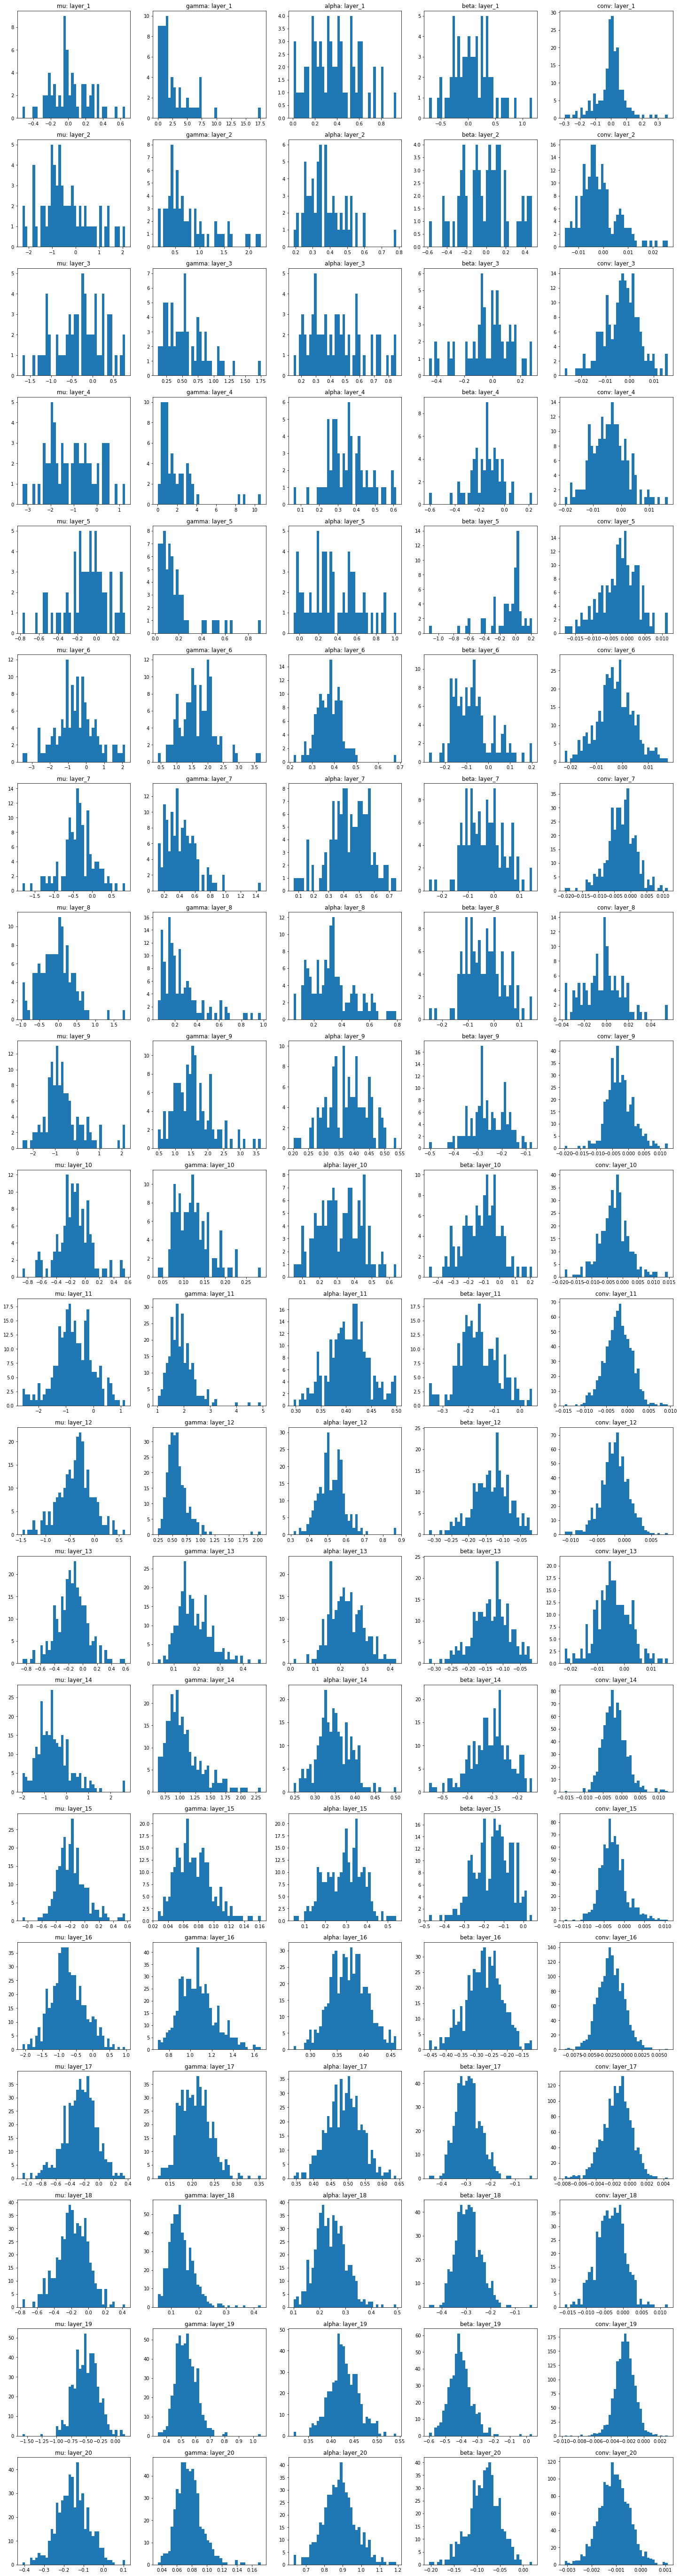

In [72]:
#bn
model = torch.load("results/resnet18_bn_bsz_128/epoch_199.pth", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]


for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))
plt.savefig("bn(bn-relu).pdf")
plt.show()


============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 
20 20 20 20 20


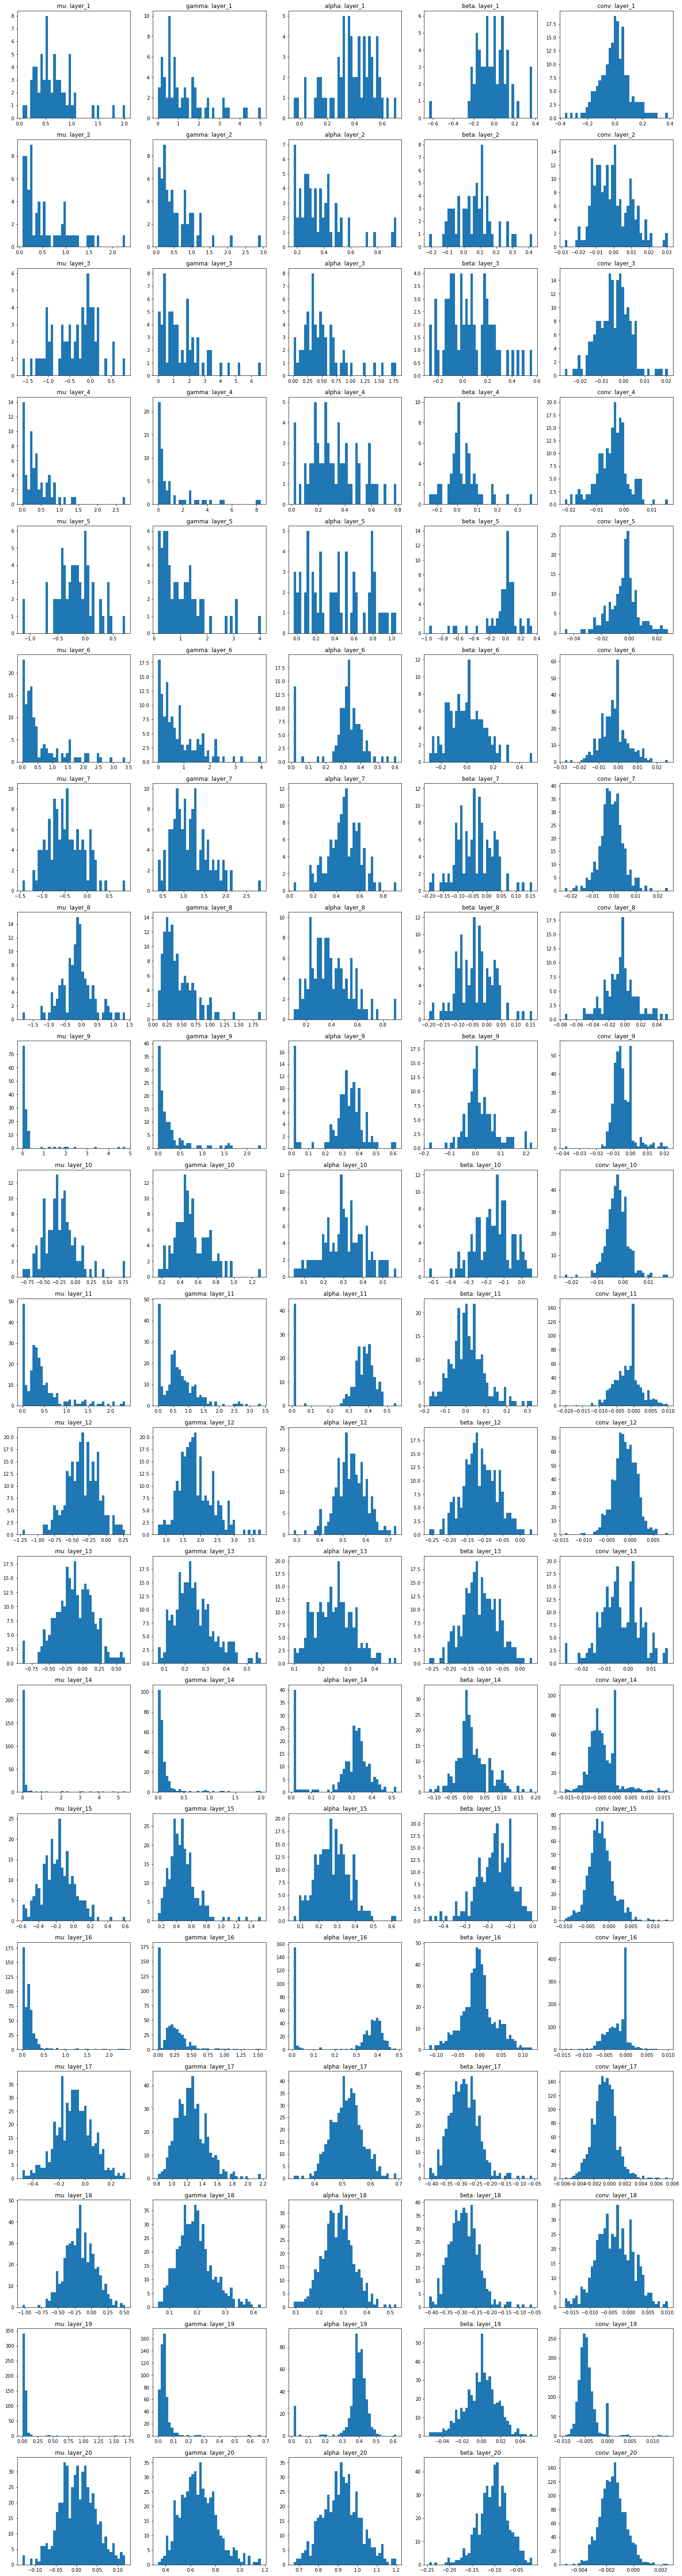

In [71]:
# bn after relu
model = torch.load("results/resnet_inverse_18/epoch_199.pth", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]


for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))
plt.savefig("bn(relu-bn).pdf")
plt.show()

(\)

============mu =========== 
============gamma =========== 
============conv =========== 
17 17 20 20 20


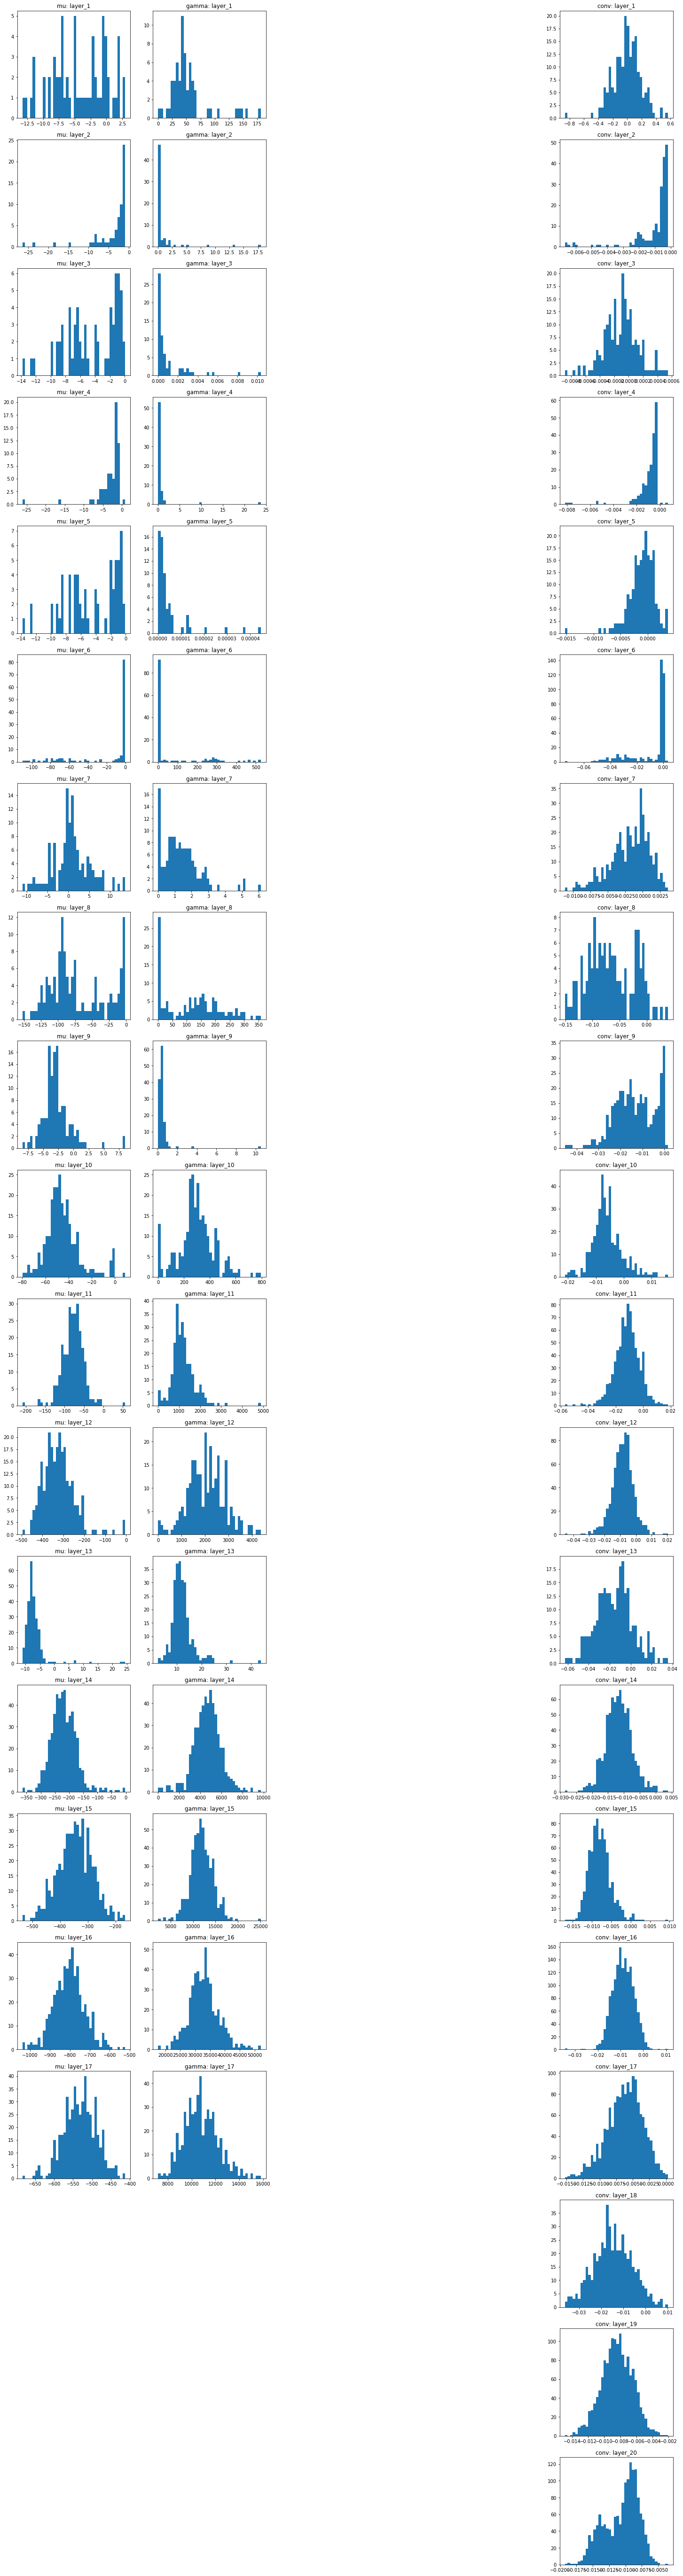

In [70]:
#sgd
model = torch.load("results/results/resnet18_nobn_bsz_128_1/_Thu-Jul--9-11:38:46-2020/epoch_200.pth", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]


for i in range(len(mu)):
    plt.subplot( len(conv), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(conv), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
# print("============alpha =========== ")


# alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
#         ('downsample.1' in i and 'weight' in i)]
# for i in range(len(alpha)):
#     plt.subplot( len(conv),5, i*5+3)
#     plt.hist(alpha[i].view(-1).numpy(), bins=40)
#     plt.title("alpha: layer_{}".format(i+1))

# print("============betta =========== ")


# beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
#         ('downsample.1' in i and 'bias' in i)]
# for i in range(len(beta)):
#     plt.subplot( len(conv),5, i*5+4)
#     plt.hist(beta[i].view(-1).numpy(), bins=40)
#     plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(conv),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))
plt.savefig("sgd.pdf")


plt.show()




============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 


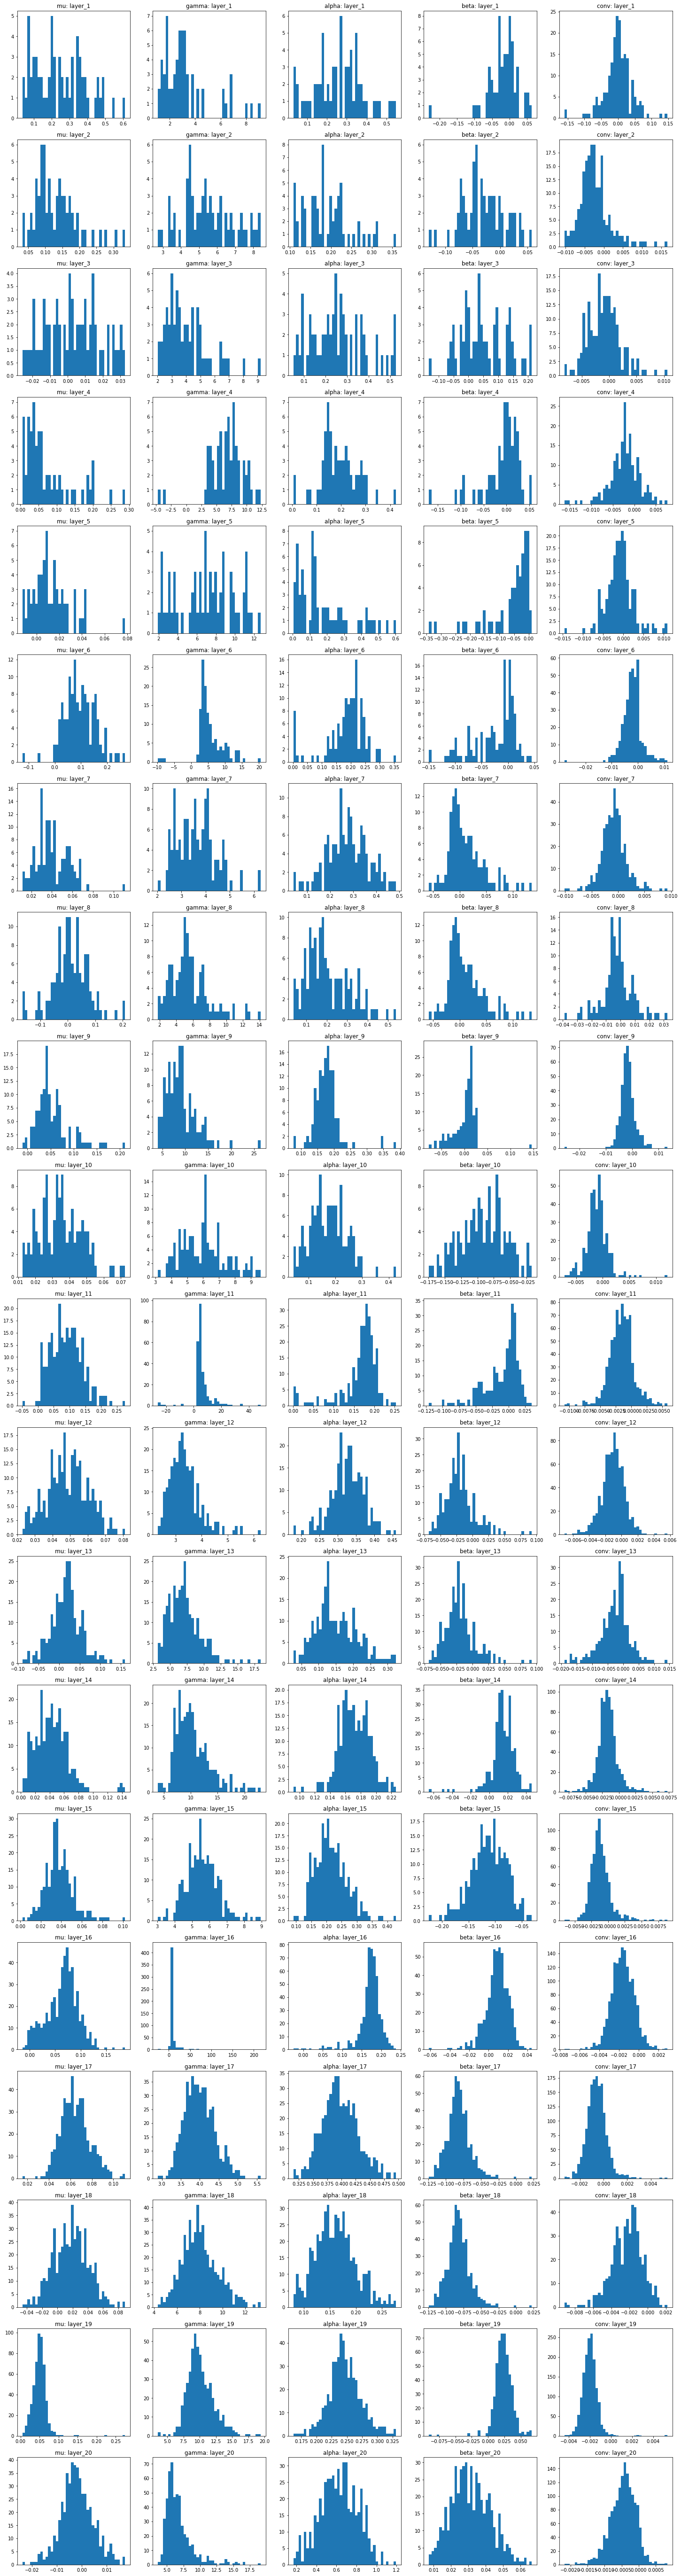

20 20 20 20 20


In [212]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(1/(gamma[i].view(-1).numpy() + 1e-3), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))

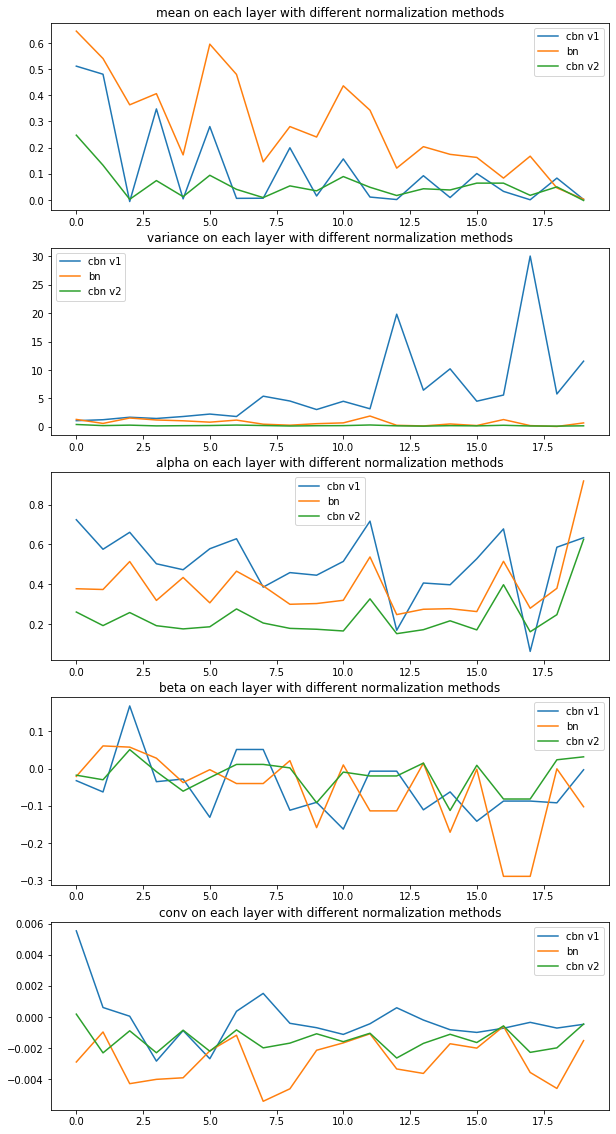

In [275]:
model = torch.load("../gamma_nominator/dual_bn/results/vgg/resnet18_constraint_bsz_128_gamma-nominator/epoch_199.pth",map_location="cpu")
model1 = torch.load("results/results/resnet18_nobn_bsz_128_1/_Thu-Jul--9-11:38:46-2020/epoch_200.pth", map_location="cpu")
model2 = torch.load("results/resnet_inverse_18/epoch_199.pth", map_location="cpu")
model3 = torch.load("./results/vgg/resnet18_constraint_bsz_128/epoch_199.pth",map_location="cpu")



mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
mu = [i.mean() for i in mu]

mu1 = [j  for (i,j) in model1['state_dict'].items() if 'running_mean' in i]
mu1 = [i.mean().abs() for i in mu1]

mu2 = [j  for (i,j) in model2['state_dict'].items() if 'running_mean' in i]
mu2 = [i.mean().abs() for i in mu2]
mu3 = [j  for (i,j) in model3['state_dict'].items() if 'mu_' in i]
mu3 = [i.mean() for i in mu3]

plt.figure(figsize=(10,20))
plt.subplot(5, 1, 1)
plt.plot(mu, label="cbn v1")
# plt.plot(mu1, label="plain (sgd)")
plt.plot(mu2, label="bn")
plt.plot(mu3, label="cbn v2")
plt.legend()
plt.title("mean on each layer with different normalization methods")

gamma = [1/(j+1e-4)  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
gamma = [i.mean() for i in gamma]
gamma1 = [j  for (i,j) in model1['state_dict'].items() if 'running_var' in i]
gamma1 = [i.mean() for i in gamma1]


gamma2 = [j  for (i,j) in model2['state_dict'].items() if 'running_var' in i]
gamma2 = [i.mean() for i in gamma2]

gamma3 = [j  for (i,j) in model3['state_dict'].items() if 'gamma_' in i]
gamma3 = [i.mean() for i in gamma3]


plt.subplot(5, 1, 2)



plt.plot(gamma, label="cbn v1")
# plt.plot(gamma1, label="plain (sgd)")
plt.plot(gamma2, label="bn")
plt.plot(gamma3, label="cbn v2")
plt.legend()



plt.title("variance on each layer with different normalization methods")

alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
alpha = [i.mean() for i in alpha]

alpha2 = [j  for (i,j) in model2['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
alpha2 = [i.mean() for i in alpha2]

alpha3 = [j  for (i,j) in model3['state_dict'].items() if 'u_' in i and 'mu_' not in i]
alpha3 = [i.mean() for i in alpha3]
plt.legend()


plt.subplot(5, 1, 3)



plt.plot(alpha, label="cbn v1")
# plt.plot(mu1, label="plain (sgd)")
plt.plot(alpha2, label="bn")
plt.plot(alpha3, label="cbn v2")
plt.legend()



plt.title("alpha on each layer with different normalization methods")

beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i ]
beta = [i.mean() for i in beta]

beta2 = [j  for (i,j) in model2['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]

beta2 = [i.mean() for i in beta2]


beta3 = [j  for (i,j) in model3['state_dict'].items() if 'c_' in i ]
beta3 = [i.mean() for i in beta3]
plt.legend()


plt.subplot(5, 1, 4)



plt.plot(beta, label="cbn v1")
# plt.plot(mu1, label="plain (sgd)")
plt.plot(beta2, label="bn")
plt.plot(beta3, label="cbn v2")

plt.legend()


plt.title("beta on each layer with different normalization methods")

conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]

conv = [i.mean() for i in conv]

conv1 = [j  for (i,j) in model1['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]

conv1 = [i.mean() for i in conv1]


conv2 = [j  for (i,j) in model2['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]

conv2 = [i.mean() for i in conv2]

conv3 = [j  for (i,j) in model3['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]

conv3 = [i.mean() for i in conv3]

plt.subplot(5, 1, 5)



plt.plot(conv, label="cbn v1")
# plt.plot(conv1, label="plain (sgd)")
plt.plot(conv2, label="bn")
plt.plot(conv3, label="cbn v2")

plt.legend()


plt.title("conv on each layer with different normalization methods")




plt.legend()
plt.show()



In [257]:
conv2[0].shape

(64, 3, 3, 3)

============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 


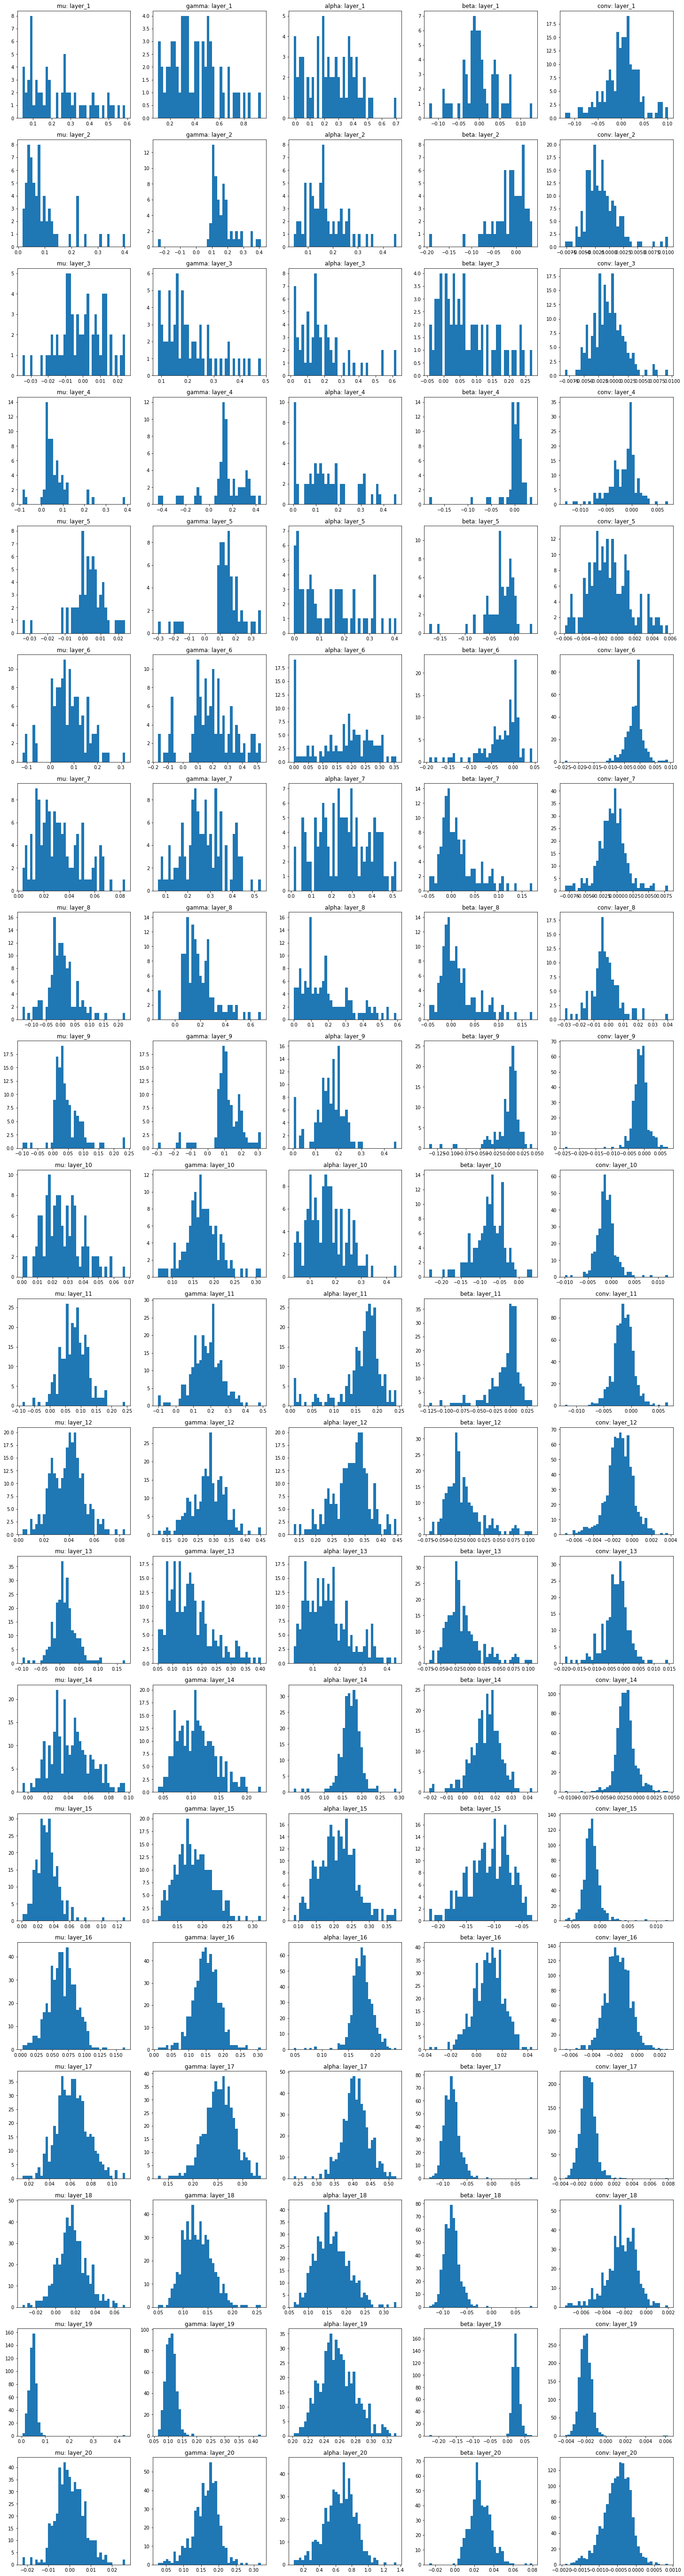

20 20 20 20 20


In [69]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist((gamma[i].view(-1).numpy() + 1e-3), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.savefig("cbn.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))

============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 


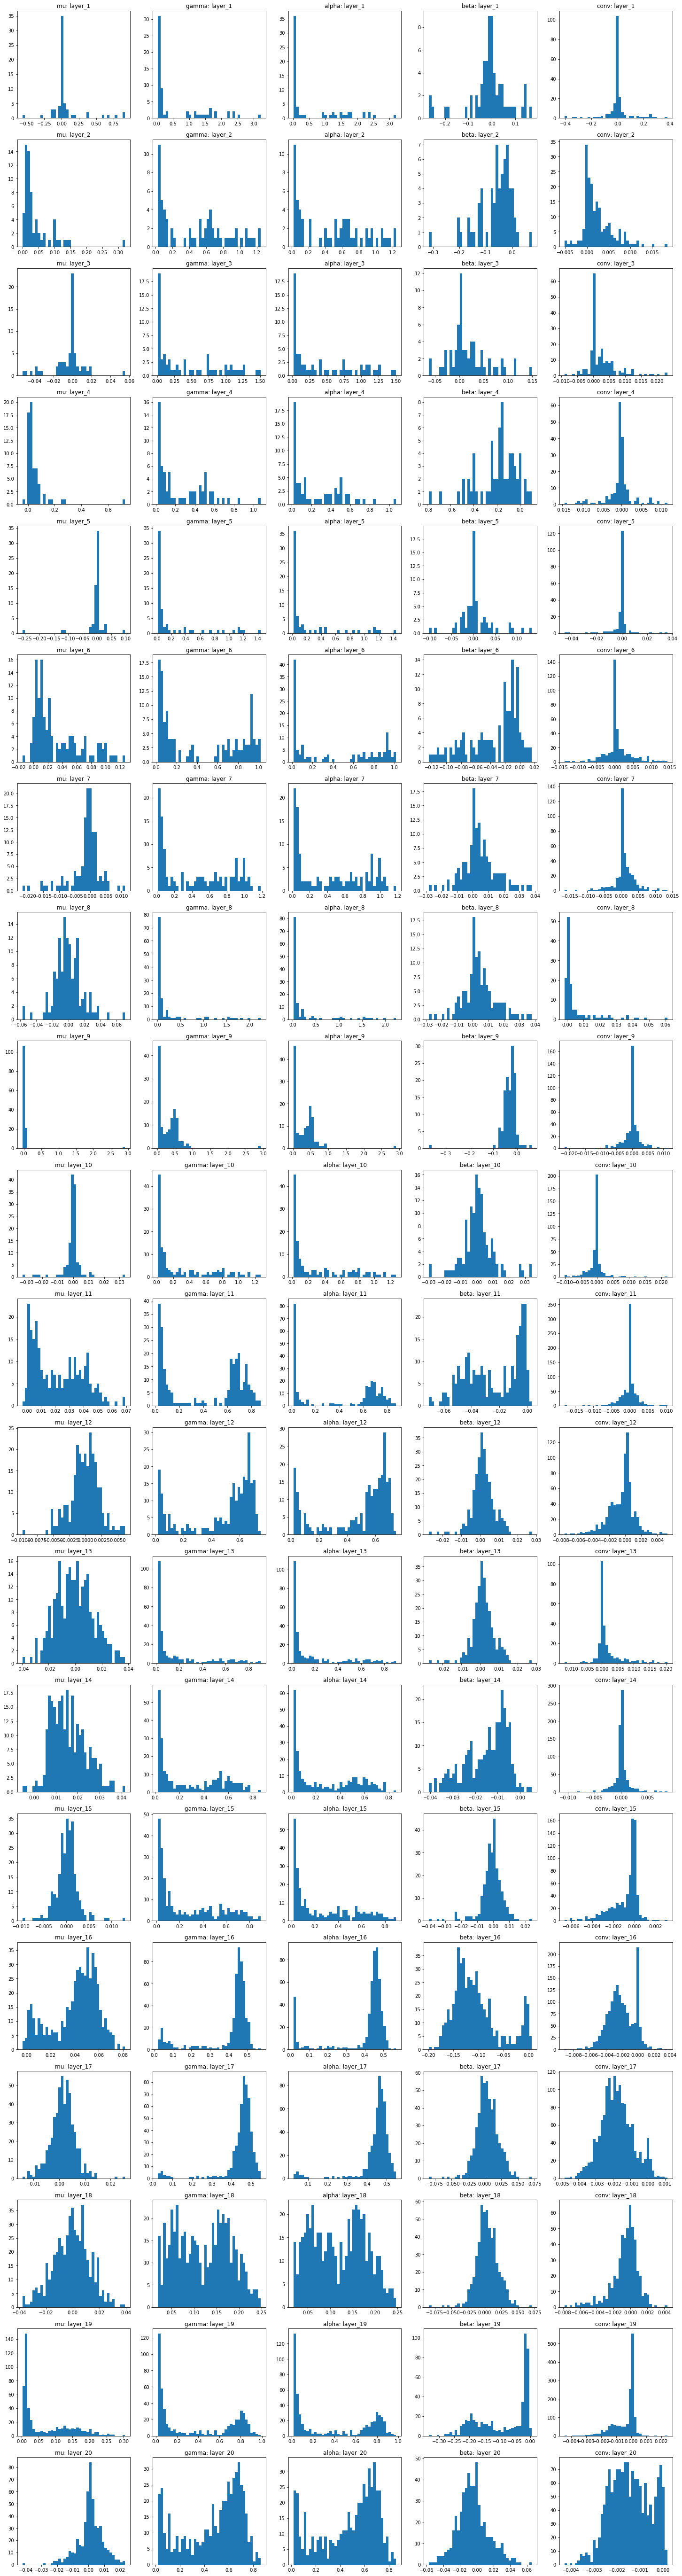

20 20 20 20 20


In [68]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128_wo_weight/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist((gamma[i].view(-1).numpy() + 1e-3), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.savefig("cbn_wo_weight-decay.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))


============mu =========== 
============gamma =========== 
============alpha =========== 
0.01327915
layer 0 gamma**2<1e-3: 0
0.0076489327
layer 1 gamma**2<1e-3: 0
0.010325969
layer 2 gamma**2<1e-3: 0
0.005252598
layer 3 gamma**2<1e-3: 0
0.006491917
layer 4 gamma**2<1e-3: 0
0.00292791
layer 5 gamma**2<1e-3: 0
0.014079201
layer 6 gamma**2<1e-3: 0
0.0021969636
layer 7 gamma**2<1e-3: 0
0.0021339052
layer 8 gamma**2<1e-3: 0
0.00978396
layer 9 gamma**2<1e-3: 0
0.0012273034
layer 10 gamma**2<1e-3: 0
0.027789026
layer 11 gamma**2<1e-3: 0
0.0027424148
layer 12 gamma**2<1e-3: 0
0.0009125152
layer 13 gamma**2<1e-3: 1
0.012368553
layer 14 gamma**2<1e-3: 0
0.00012361986
layer 15 gamma**2<1e-3: 17
0.023375612
layer 16 gamma**2<1e-3: 0
0.004259354
layer 17 gamma**2<1e-3: 0
0.0016696675
layer 18 gamma**2<1e-3: 0
0.00226633
layer 19 gamma**2<1e-3: 0
============alpha ==========min gamma**2 [False False False False False False False False False False False False
 False False False False False False Fal

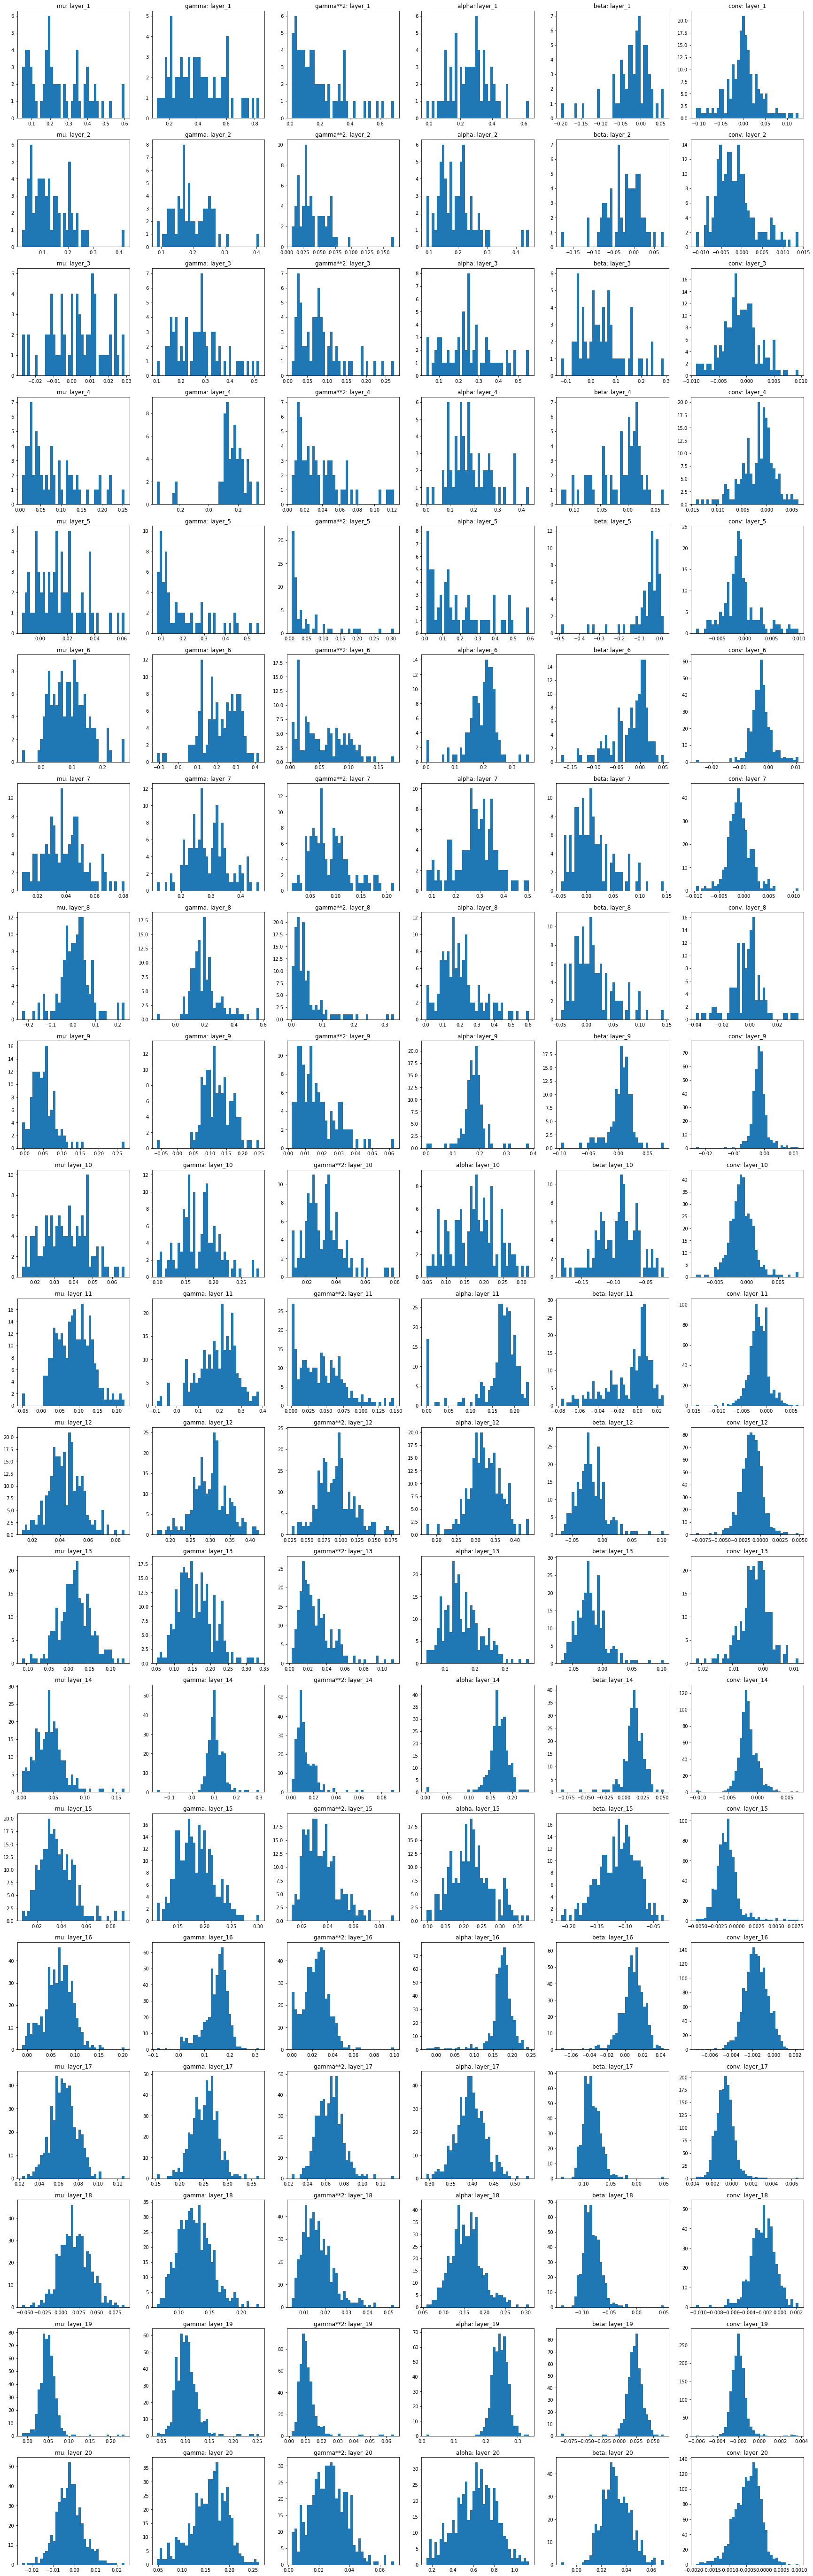

20 20 20 20 20


In [102]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(30,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 6, i*6+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")

gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+2)
    plt.hist(((gamma[i]).view(-1).numpy() ), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")

small_gamma = []
gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+3)
    plt.hist(((gamma[i]**2).view(-1).numpy()), bins=40)
    b = (gamma[i]**2).view(-1).numpy()
    print(b.min())
    b_min = b.min()
    b = b<1e-3
    small_gamma.append(np.sum(b))
    print("layer {} gamma**2<1e-3: {}".format(i, small_gamma[-1]))
    plt.title("gamma**2: layer_{}".format(i+1))
print("============alpha ==========" + "min gamma**2 {} ".format(b_min +  "layer {} gamma**2<1e-3: {}".format(i, small_gamma[-1]))


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),6, i*6+4)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),6, i*6+5)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),6, i*6+6)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.savefig("cbn.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))

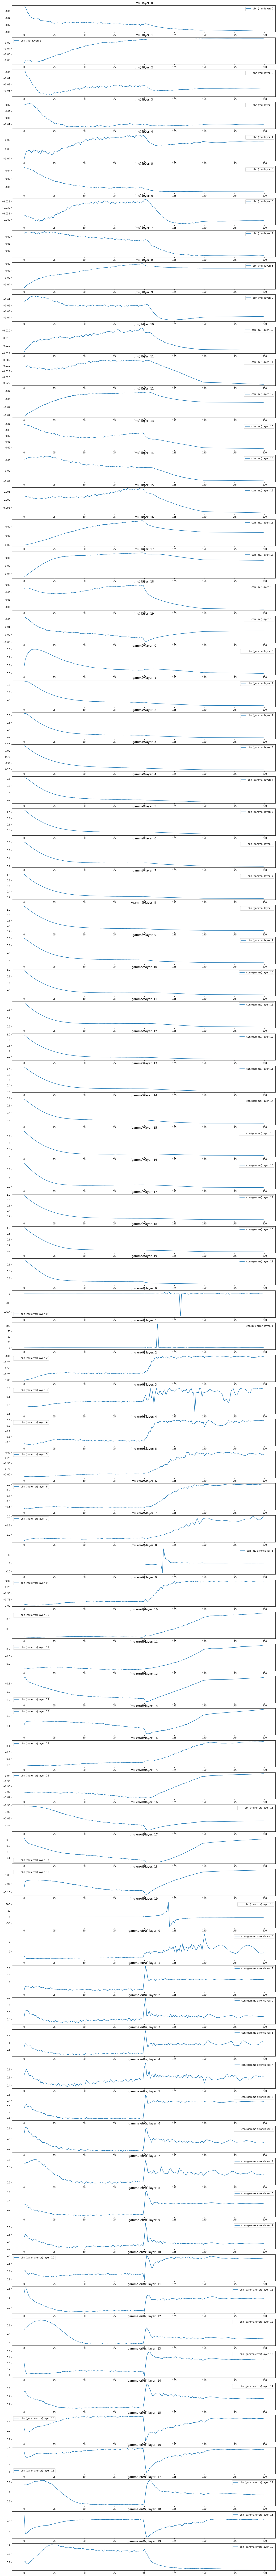

In [286]:
norm_stat = torch.load("results/vgg/resnet18_constraint_bsz_128_bn-relu_mu_weight_+10+1/norm_stat.pth")
result = norm_stat
plt.figure(figsize=(20,200))
idx = 0
for i in range(20):
    plt.subplot(80, 1, i+1 + idx)
    mu_i = [j[i] for j in result[0]]
    plt.plot(mu_i, label="cbn (mu) layer: " + str(i))
    plt.legend()
    plt.title("(mu) layer: " + str(i))
idx +=20

for i in range(20):
    plt.subplot(80, 1, i+1 + idx)
    var_i = [j[i] for j in result[1]]
    plt.plot(var_i, label="cbn (gamma) layer: " + str(i))
    plt.legend()
    plt.title("(gamma) layer: " + str(i))
idx +=20

for i in range(20):
    plt.subplot(80, 1, i+1 + idx)
    var_i = [(j[i] - k[i]).abs() /(k[i]) for j,k in zip(result[0], result[2])]
    plt.plot(var_i, label="cbn (mu error) layer: " + str(i))
    plt.legend()
    plt.title("(mu error) layer: " + str(i))
idx +=20
for i in range(20):
    plt.subplot(80, 1, i+1 + idx)
    var_i = [j[i] for j in result[5]]
    plt.plot(var_i, label="cbn (gamma error) layer: " + str(i))
    plt.legend()
    plt.title("(gamma error) layer: " + str(i))
idx +=20
plt.show()




============mu =========== 
============gamma =========== 
============alpha =========== 
0.012582874
layer 0 gamma**2<1e-3: 0
0.014817145
layer 1 gamma**2<1e-3: 0
0.014853286
layer 2 gamma**2<1e-3: 0
0.004286522
layer 3 gamma**2<1e-3: 0
0.0058145663
layer 4 gamma**2<1e-3: 0
0.0026821832
layer 5 gamma**2<1e-3: 0
0.021008879
layer 6 gamma**2<1e-3: 0
0.0016711868
layer 7 gamma**2<1e-3: 0
0.0025371849
layer 8 gamma**2<1e-3: 0
0.008094736
layer 9 gamma**2<1e-3: 0
0.0
layer 10 gamma**2<1e-3: 8
0.021020366
layer 11 gamma**2<1e-3: 0
0.0023825748
layer 12 gamma**2<1e-3: 0
0.0012624866
layer 13 gamma**2<1e-3: 0
0.009512454
layer 14 gamma**2<1e-3: 0
9.980572e-35
layer 15 gamma**2<1e-3: 27
0.011169479
layer 16 gamma**2<1e-3: 0
0.0020556515
layer 17 gamma**2<1e-3: 0
0.0019418693
layer 18 gamma**2<1e-3: 0
0.00159352
layer 19 gamma**2<1e-3: 0
============betta =========== 
============conv =========== 


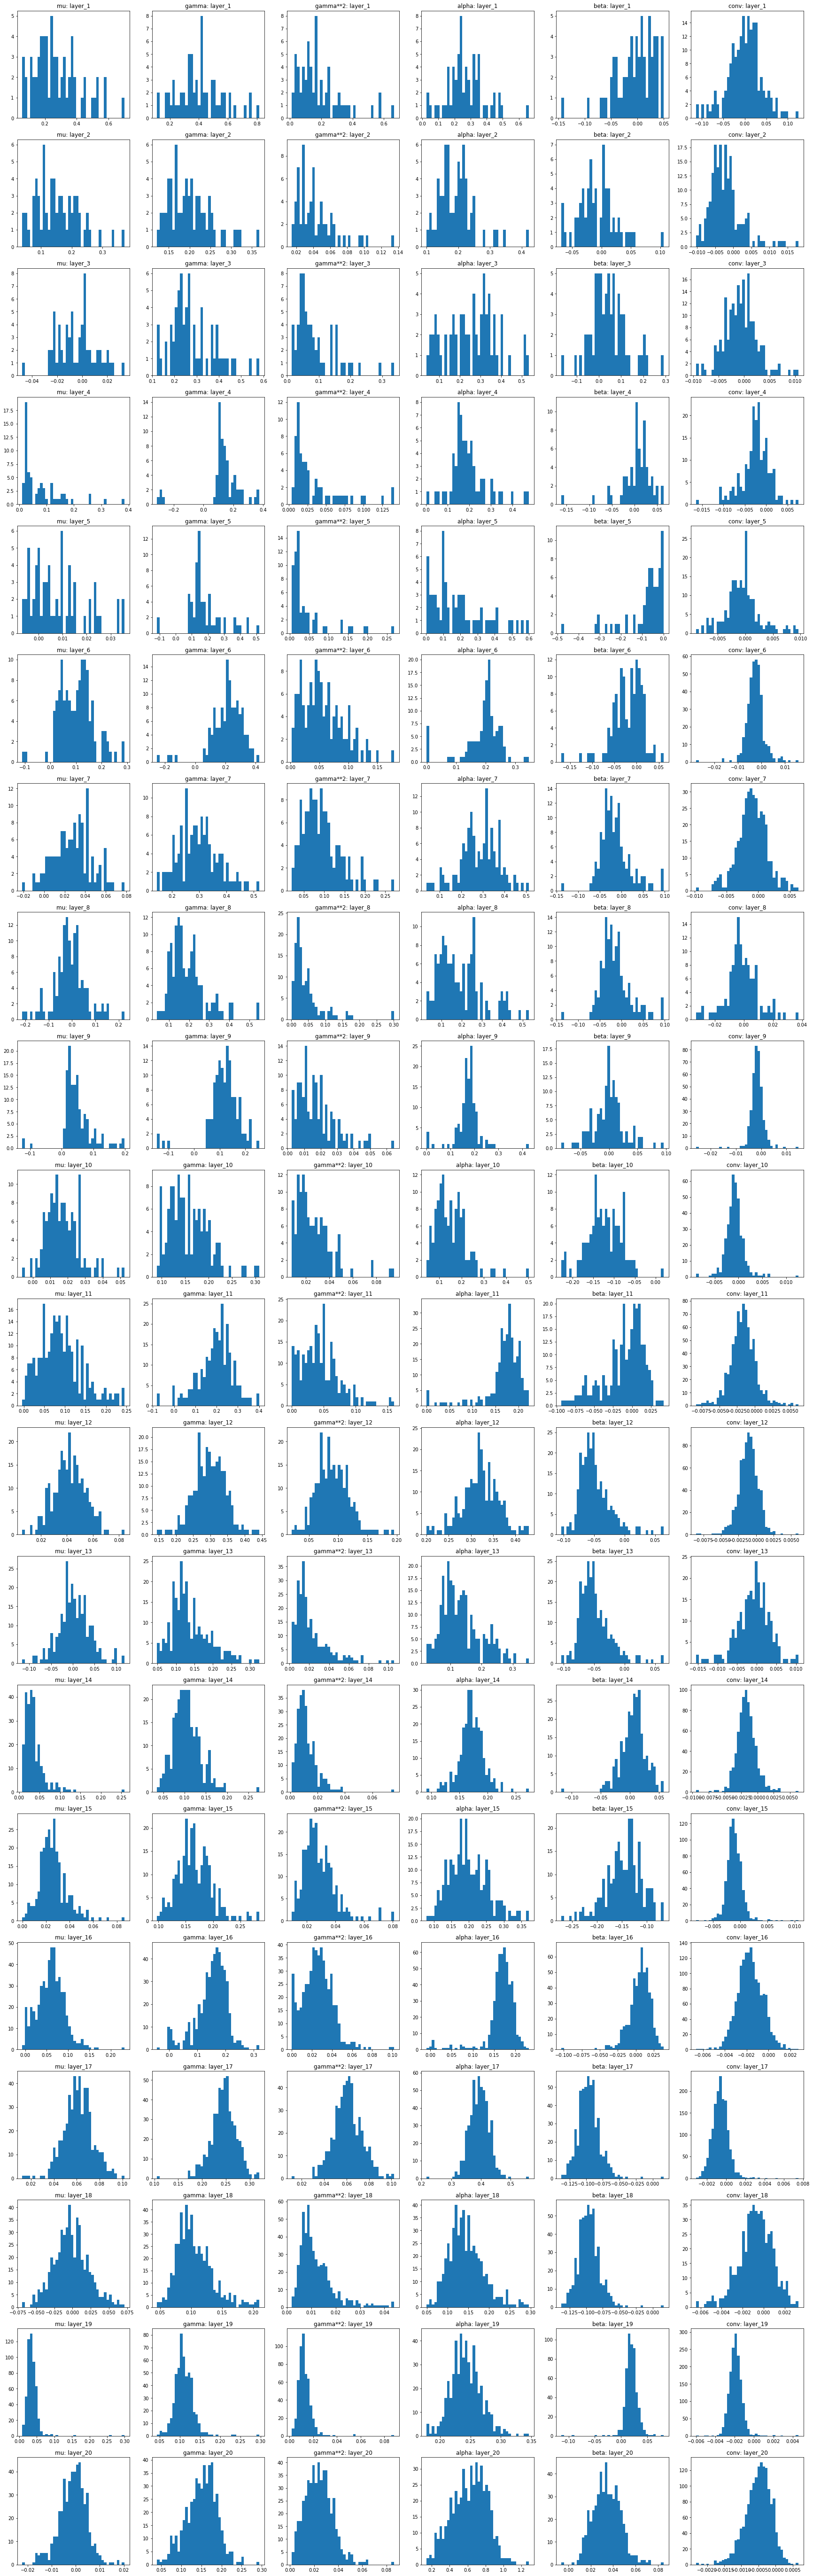

20 20 20 20 20


In [284]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128_mu_weight_+10+1/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(30,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 6, i*6+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")

gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+2)
    plt.hist(((gamma[i]).view(-1).numpy() ), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")

small_gamma = []
gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+3)
    plt.hist(((gamma[i]**2).view(-1).numpy()), bins=40)
    b = (gamma[i]**2).view(-1).numpy()
    print(b.min())
    b_min = b.min()
    b = b<1e-3
    small_gamma.append(np.sum(b))
    print("layer {} gamma**2<1e-3: {}".format(i, small_gamma[-1]))
    plt.title("gamma**2: layer_{}".format(i+1))


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),6, i*6+4)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),6, i*6+5)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),6, i*6+6)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.savefig("cbn.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))



============mu =========== 
============gamma =========== 
============alpha =========== 
0.022775767
layer 0 gamma**2<1e-3: 0
0.01118303
layer 1 gamma**2<1e-3: 0
0.005246437
layer 2 gamma**2<1e-3: 0
0.008894528
layer 3 gamma**2<1e-3: 0
0.005687709
layer 4 gamma**2<1e-3: 0
0.00846289
layer 5 gamma**2<1e-3: 0
0.0053614555
layer 6 gamma**2<1e-3: 0
0.0020540033
layer 7 gamma**2<1e-3: 0
0.016378444
layer 8 gamma**2<1e-3: 0
0.0020636467
layer 9 gamma**2<1e-3: 0
0.0006356852
layer 10 gamma**2<1e-3: 1
0.0015303271
layer 11 gamma**2<1e-3: 0
0.0010417183
layer 12 gamma**2<1e-3: 0
0.012516042
layer 13 gamma**2<1e-3: 0
0.0031359484
layer 14 gamma**2<1e-3: 0
0.005705408
layer 15 gamma**2<1e-3: 0
0.0007620953
layer 16 gamma**2<1e-3: 1
0.00023747742
layer 17 gamma**2<1e-3: 4
0.016486514
layer 18 gamma**2<1e-3: 0
1.2415811e-05
layer 19 gamma**2<1e-3: 156
============betta =========== 
============conv =========== 


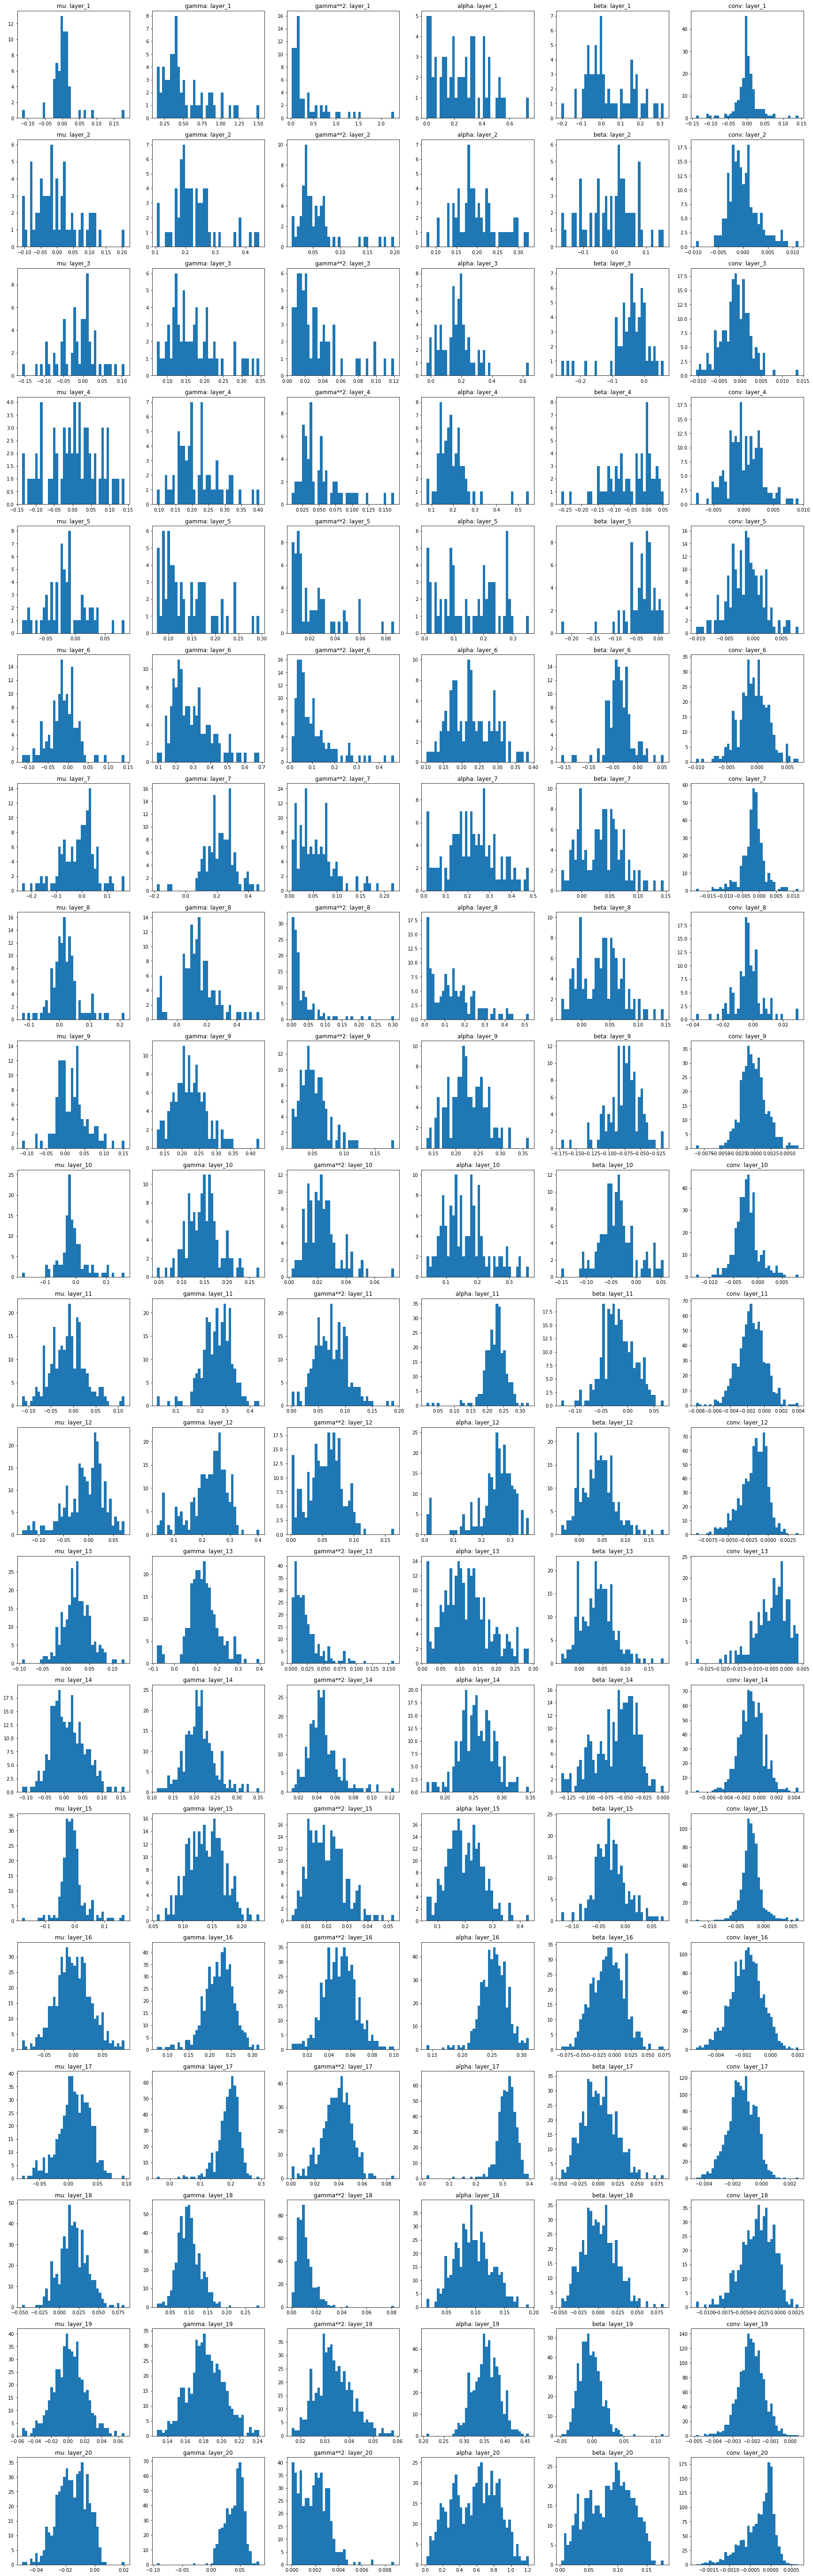

20 20 20 20 20


In [184]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128_bn-relu/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(30,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 6, i*6+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")

gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+2)
    plt.hist(((gamma[i]).view(-1).numpy() ), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")

small_gamma = []
gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+3)
    plt.hist(((gamma[i]**2).view(-1).numpy()), bins=40)
    b = (gamma[i]**2).view(-1).numpy()
    print(b.min())
    b_min = b.min()
    b = b<1e-3
    small_gamma.append(np.sum(b))
    print("layer {} gamma**2<1e-3: {}".format(i, small_gamma[-1]))
    plt.title("gamma**2: layer_{}".format(i+1))


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),6, i*6+4)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),6, i*6+5)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),6, i*6+6)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.savefig("cbn.pdf")
plt.show()


============mu =========== 
============gamma =========== 
============alpha =========== 
0.027490195
layer 0 gamma**2<1e-3: 0
0.01451603
layer 1 gamma**2<1e-3: 0
0.0040705292
layer 2 gamma**2<1e-3: 0
0.012875641
layer 3 gamma**2<1e-3: 0
0.0045782835
layer 4 gamma**2<1e-3: 0
0.006190484
layer 5 gamma**2<1e-3: 0
0.0022427754
layer 6 gamma**2<1e-3: 0
0.0013479724
layer 7 gamma**2<1e-3: 0
0.00761852
layer 8 gamma**2<1e-3: 0
0.002001993
layer 9 gamma**2<1e-3: 0
0.005277149
layer 10 gamma**2<1e-3: 0
0.0005517257
layer 11 gamma**2<1e-3: 2
0.00018033558
layer 12 gamma**2<1e-3: 15
0.0057077515
layer 13 gamma**2<1e-3: 0
0.0019955442
layer 14 gamma**2<1e-3: 0
0.00014643696
layer 15 gamma**2<1e-3: 2
5.962837e-12
layer 16 gamma**2<1e-3: 5
2.8526456e-10
layer 17 gamma**2<1e-3: 28
0.009263586
layer 18 gamma**2<1e-3: 0
6.7193515e-19
layer 19 gamma**2<1e-3: 163
============betta =========== 
============conv =========== 


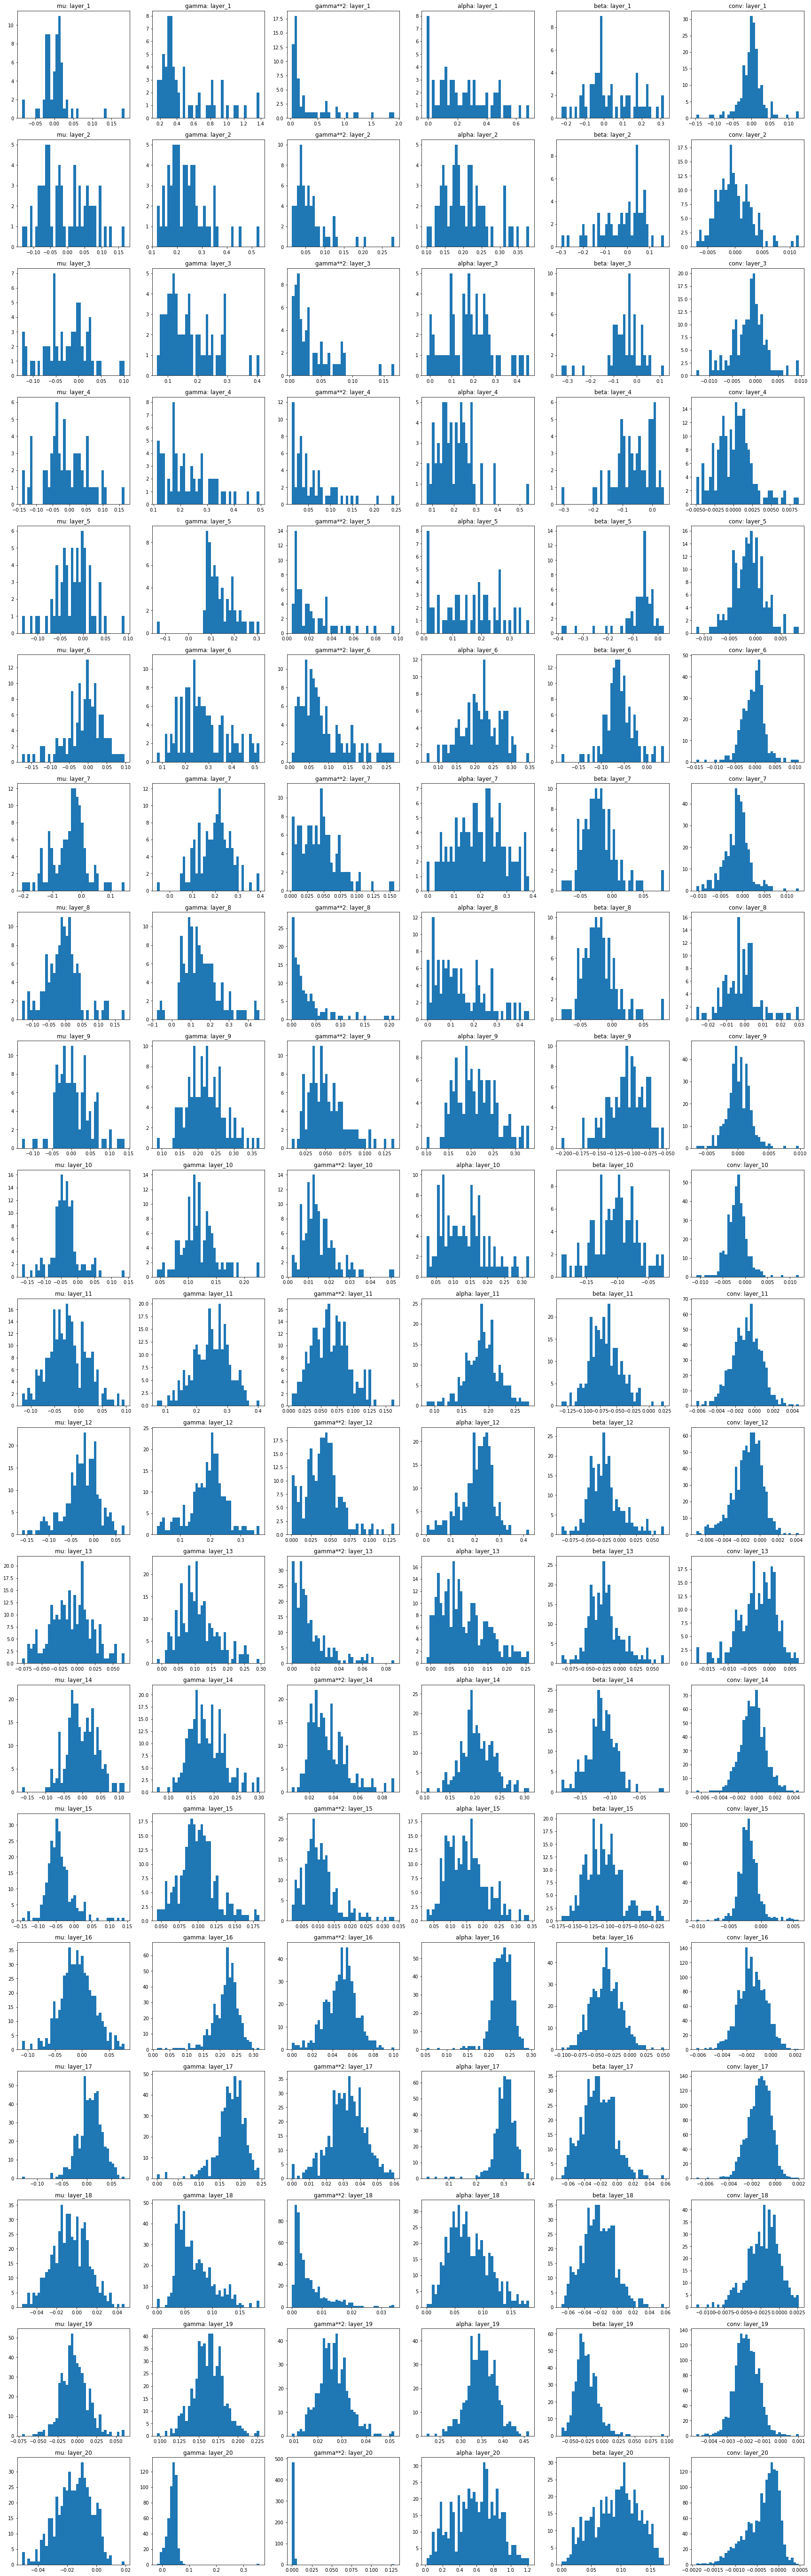

20 20 20 20 20


In [285]:
#constrained
model = torch.load("./results/vgg/resnet18_constraint_bsz_128_bn-relu_mu_weight_+10+1/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(30,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]



for i in range(len(mu)):
    plt.subplot( len(mu), 6, i*6+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")

gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+2)
    plt.hist(((gamma[i]).view(-1).numpy() ), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")

small_gamma = []
gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+3)
    plt.hist(((gamma[i]**2).view(-1).numpy()), bins=40)
    b = (gamma[i]**2).view(-1).numpy()
    print(b.min())
    b_min = b.min()
    b = b<1e-3
    small_gamma.append(np.sum(b))
    print("layer {} gamma**2<1e-3: {}".format(i, small_gamma[-1]))
    plt.title("gamma**2: layer_{}".format(i+1))


alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),6, i*6+4)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),6, i*6+5)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),6, i*6+6)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
plt.savefig("cbn.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))

============mu =========== 
============gamma =========== 
============alpha =========== 
============betta =========== 
============conv =========== 
20 20 20 20 20


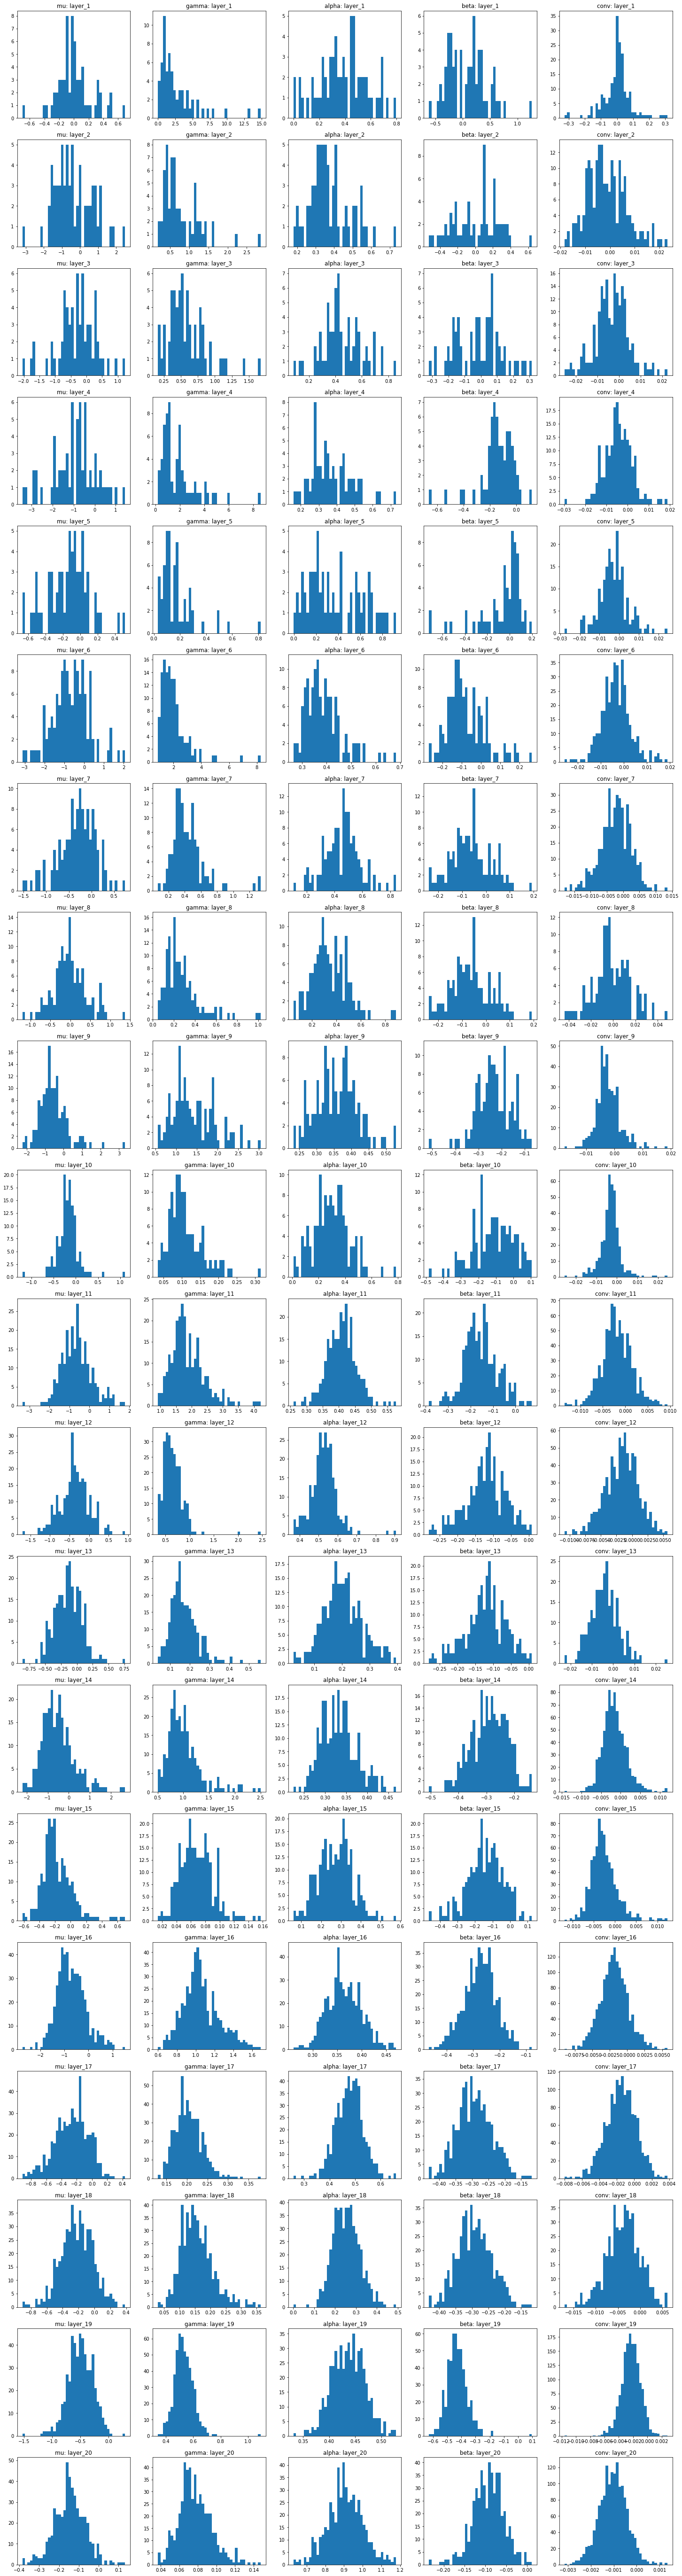

In [3]:
#bn
model = torch.load("results/resnet_mybn_18+_bn_bsz_+128_norm_+bn_Mon-Jul-27-07:47:05-2020/epoch_199.pth", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]


for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
print("============gamma =========== ")


gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
print("============alpha =========== ")


alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))

print("============betta =========== ")


beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
print("============conv =========== ")


for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))
plt.savefig("bn(bn-relu).pdf")
plt.show()



============mu =========== 
mean:  0.01006 -0.24740 -0.07007 -0.18169 -0.08030 -0.03186 -0.07269 -0.00376 -0.19601 -0.03278 -0.06081 -0.07619 -0.00582 -0.16083 -0.02495 -0.05115 -0.06268 -0.00342 -0.10996 0.00490
var:  0.04519 0.76259 0.03397 0.68141 0.02748 0.06178 0.01487 0.00844 0.61830 0.02326 0.04112 0.01400 0.00895 0.50363 0.00911 0.01905 0.00513 0.00569 0.00819 0.00185
============gamma =========== 
mean:  2.81248 1.00185 0.69620 2.29728 0.33234 3.55637 0.77710 0.42905 2.23382 0.29018 3.20460 0.90394 0.37833 1.76866 0.29648 2.18817 0.45017 0.28866 1.59629 0.34626
var:  5.08777 0.38239 0.10459 2.65494 0.05504 1.57753 0.07729 0.03272 0.41973 0.01003 0.48766 0.04624 0.01300 0.24635 0.00725 0.10610 0.00424 0.00333 0.04553 0.00194
============alpha =========== 
mean:  0.38763 0.36947 0.43525 0.36793 0.40331 0.41774 0.44757 0.31598 0.38567 0.36354 0.40895 0.45571 0.25531 0.38970 0.40429 0.39208 0.55398 0.31113 0.43156 0.95715
var:  0.01818 0.00980 0.03570 0.01138 0.07273 0.00261 0.011

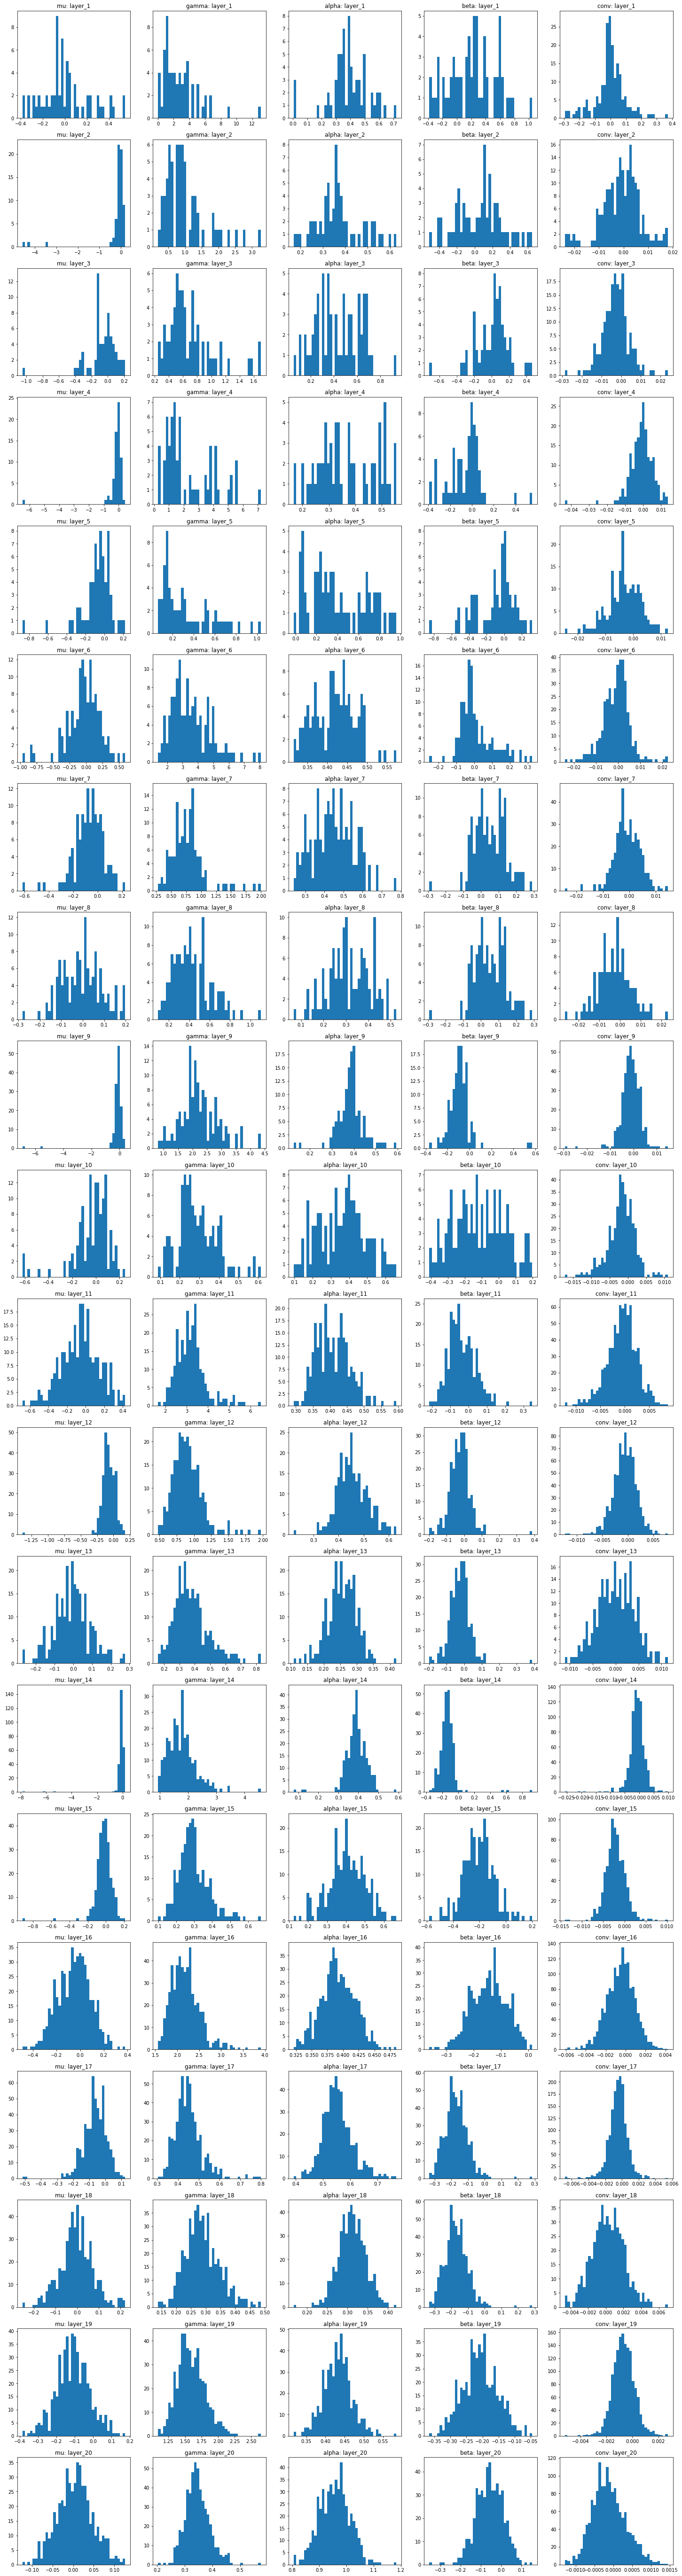

In [6]:
#bn
model = torch.load("results/resnet_mybn_18+_bn_bsz_+128_norm_+bn_Mon-Jul-27-07:51:35-2020/epoch_199.pth", map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'running_mean' in i]
plt.figure(figsize=(25,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample.0' in i and 'weight' in i)]
f = open("bn_bsz_1024.txt", 'w')
mean = ''
var = ''
for i in range(len(mu)):
    plt.subplot( len(mu), 5, i*5+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(mu[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(mu[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============gamma =========== ")
f.write("")
    
mean = ''
var = ''
gamma = [j  for (i,j) in model['state_dict'].items() if 'running_var' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 5, i*5+2)
    plt.hist(gamma[i].view(-1).numpy(), bins=40)
    plt.title("gamma: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(gamma[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(gamma[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============alpha =========== ")

mean = ''
var = ''
alpha = [j  for (i,j) in model['state_dict'].items() if ('weight' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'weight' in i)]
for i in range(len(alpha)):
    plt.subplot( len(mu),5, i*5+3)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(alpha[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(alpha[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============betta =========== ")

mean = ''
var = ''
beta = [j  for (i,j) in model['state_dict'].items() if ('bias' in i and 'bn'  in i) or \
        ('downsample.1' in i and 'bias' in i)]
for i in range(len(beta)):
    plt.subplot( len(mu),5, i*5+4)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(beta[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(beta[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============conv =========== ")

mean = ''
var = ''
for i in range(len(conv)):
    plt.subplot( len(mu),5, i*5+5)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(conv[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(conv[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
plt.savefig("bn(bn-relu).pdf")
plt.show()




============mu =========== 
mean:  0.01104 0.01588 -0.00856 0.02074 -0.01073 0.04005 -0.00351 -0.00006 0.06307 -0.02457 0.04798 0.01503 -0.00703 0.06254 -0.01758 0.07030 0.10203 -0.01159 0.10829 -0.24480
var:  0.00170 0.00535 0.00443 0.00547 0.00158 0.00135 0.00222 0.00254 0.00170 0.00198 0.00126 0.00107 0.00076 0.00153 0.00207 0.00093 0.00135 0.00034 0.00162 0.01740
============gamma =========== 
mean:  0.34593 0.05931 0.03436 0.05031 0.02438 0.09386 0.04639 0.03109 0.05149 0.01640 0.06734 0.04042 0.01654 0.03577 0.01148 0.05216 0.03483 0.00548 0.02623 0.00261
var:  0.16070 0.00203 0.00080 0.00140 0.00036 0.00491 0.00107 0.00248 0.00062 0.00010 0.00103 0.00052 0.00032 0.00024 0.00003 0.00029 0.00010 0.00004 0.00005 0.00000
============alpha =========== 
mean:  0.23781 0.19730 0.16892 0.19693 0.15734 0.21385 0.20533 0.12645 0.20831 0.13164 0.18516 0.21513 0.08749 0.20631 0.14725 0.23088 0.31471 0.07171 0.36263 0.58832
var:  0.03039 0.00410 0.01180 0.00592 0.01074 0.00326 0.01070 0.0129

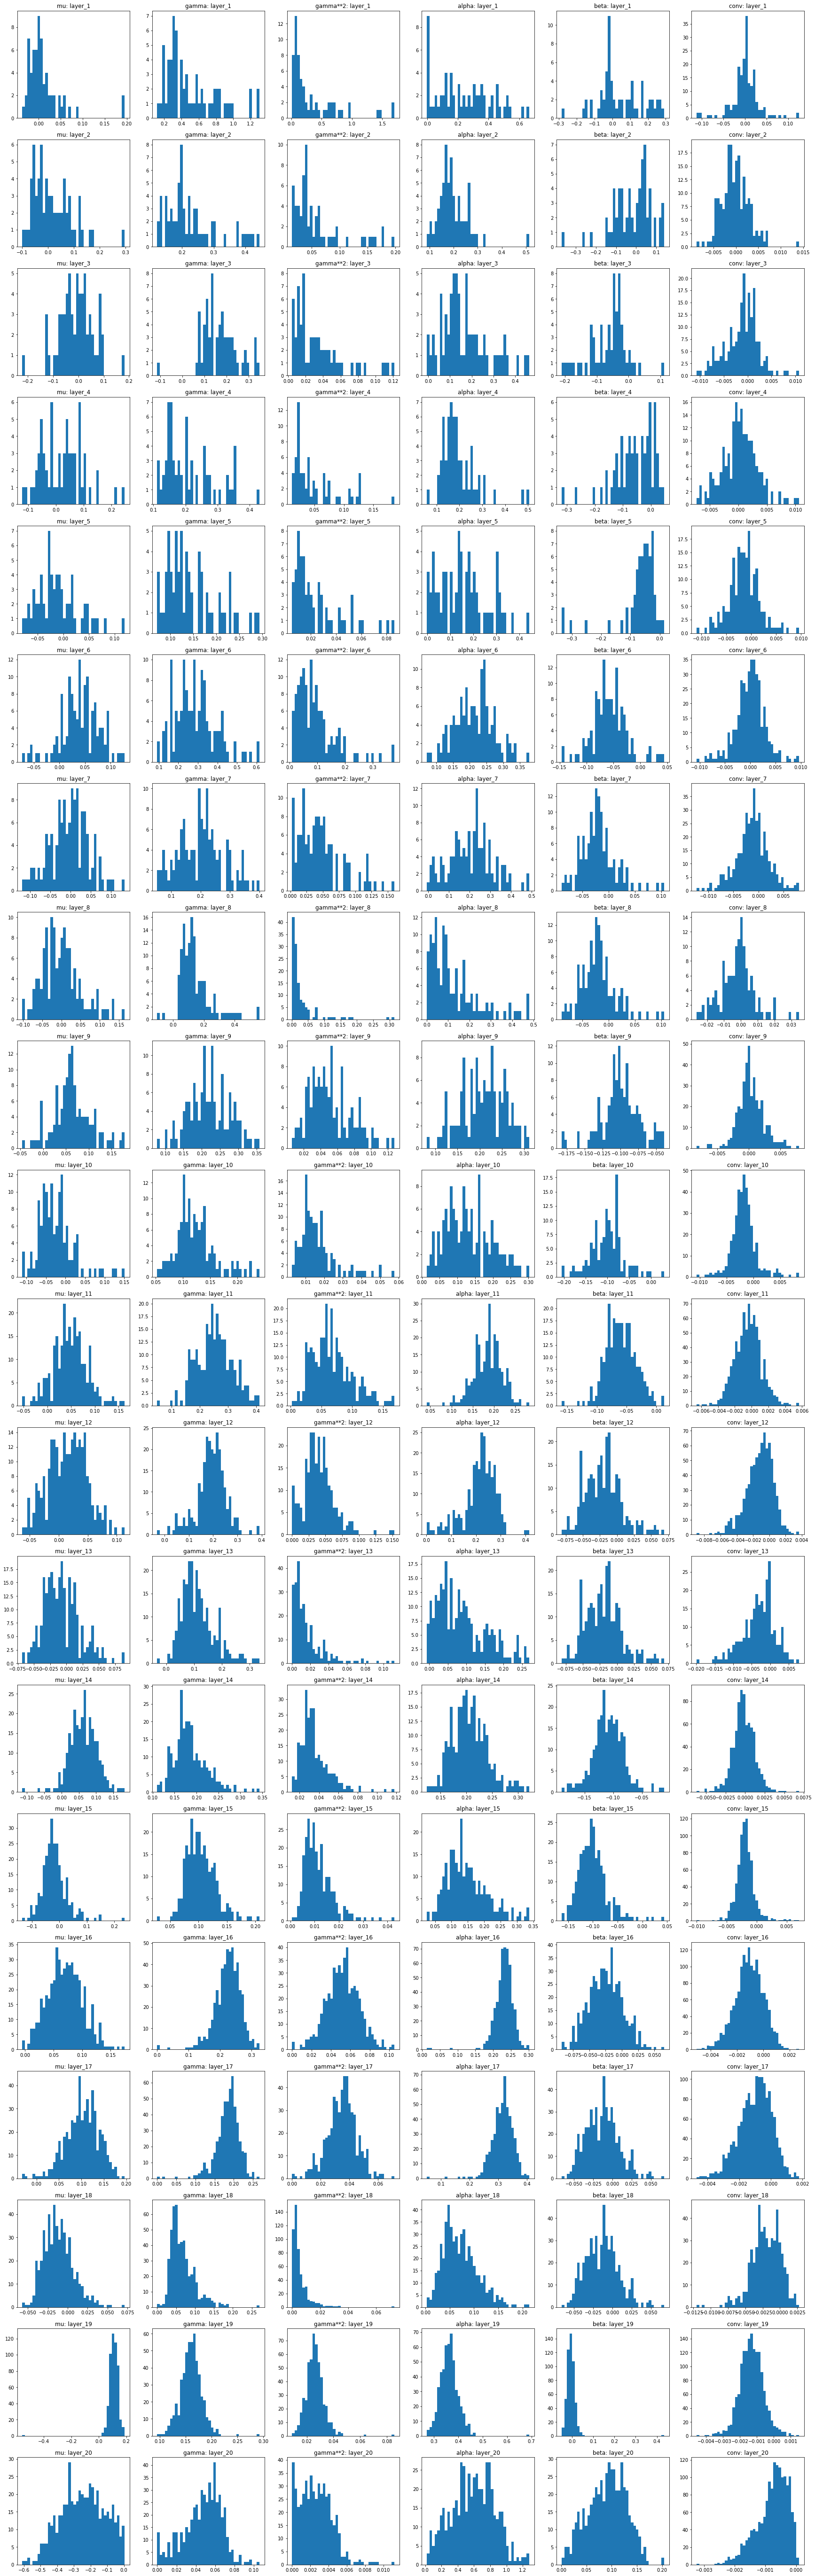

20 20 20 20 20


In [8]:
#constrained
model = torch.load("./results/resnet18_constraint_+resnet_constraint_bn_relu18+cbn_notheta+weight+10+mean+1+decay+0.1+affine_decay+0.0001/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(30,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]

mean = ''
var = ''

for i in range(len(mu)):
    plt.subplot( len(mu), 6, i*6+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(mu[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(mu[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============gamma =========== ")
mean = ''
var = ''
gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+2)
    plt.hist(((gamma[i]).view(-1).numpy() ), bins=40)
    plt.title("gamma: layer_{}".format(i+1))

mean = ''
var = ''
small_gamma = []
gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+3)
    plt.hist(((gamma[i]**2).view(-1).numpy()), bins=40)
    b = (gamma[i]**2).view(-1).numpy()
    b_min = b.min()
    b = b<1e-3
    small_gamma.append(np.sum(b))
    plt.title("gamma**2: layer_{}".format(i+1))

    mean += " {:.5f}".format(np.mean((gamma[i]**2).view(-1).numpy()))
    var += " {:.5f}".format(np.var((gamma[i]**2).view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============alpha =========== ")


mean = ''
var = ''
alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),6, i*6+4)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(alpha[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(alpha[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============betta =========== ")
mean = ''
var = ''

beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),6, i*6+5)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(beta[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(beta[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============conv =========== ")

mean = ''
var = ''
for i in range(len(conv)):
    plt.subplot( len(mu),6, i*6+6)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(conv[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(conv[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
plt.savefig("cbn.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))

In [2]:
#constrained
model = torch.load("./results/imagenet/constraint_20+norm_layer_+cbn+noise_0.0001+warmup_+41,61,81_Mon-Aug-10-07:16:21-2020/epoch_199.pth",map_location="cpu")
mu = [j  for (i,j) in model['state_dict'].items() if 'mu_' in i]
plt.figure(figsize=(30,100))
print("============mu =========== ")
conv = [j  for (i,j) in model['state_dict'].items() if ('conv' in i and 'weight' in i) or \
        ('downsample' in i and 'bn' not in i and 'weight' in i)]

mean = ''
var = ''

for i in range(len(mu)):
    plt.subplot( len(mu), 6, i*6+1)
    plt.hist(mu[i].view(-1).numpy(), bins=40)
    plt.title("mu: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(mu[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(mu[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============gamma =========== ")
mean = ''
var = ''
gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+2)
    plt.hist(((gamma[i]).view(-1).numpy() ), bins=40)
    plt.title("gamma: layer_{}".format(i+1))

mean = ''
var = ''
small_gamma = []
gamma = [j  for (i,j) in model['state_dict'].items() if 'gamma_' in i]
for i in range(len(gamma)):
    plt.subplot( len(mu), 6, i*6+3)
    plt.hist(((gamma[i]**2).view(-1).numpy()), bins=40)
    b = (gamma[i]**2).view(-1).numpy()
    b_min = b.min()
    b = b<1e-3
    small_gamma.append(np.sum(b))
    plt.title("gamma**2: layer_{}".format(i+1))

    mean += " {:.5f}".format(np.mean((gamma[i]**2).view(-1).numpy()))
    var += " {:.5f}".format(np.var((gamma[i]**2).view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============alpha =========== ")


mean = ''
var = ''
alpha = [j  for (i,j) in model['state_dict'].items() if 'u_' in i and 'mu_' not in i]
for i in range(len(alpha)):
    plt.subplot( len(mu),6, i*6+4)
    plt.hist(alpha[i].view(-1).numpy(), bins=40)
    plt.title("alpha: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(alpha[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(alpha[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============betta =========== ")
mean = ''
var = ''

beta = [j  for (i,j) in model['state_dict'].items() if 'c_' in i]
for i in range(len(beta)):
    plt.subplot( len(mu),6, i*6+5)
    plt.hist(beta[i].view(-1).numpy(), bins=40)
    plt.title("beta: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(beta[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(beta[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
print("============conv =========== ")

mean = ''
var = ''
for i in range(len(conv)):
    plt.subplot( len(mu),6, i*6+6)
    plt.hist(conv[i].mean([1,2]).view(-1).numpy(), bins=40)
    plt.title("conv: layer_{}".format(i+1))
    mean += " {:.5f}".format(np.mean(conv[i].view(-1).numpy()))
    var += " {:.5f}".format(np.var(conv[i].view(-1).numpy()))
print("mean: " + mean)
print("var: "+var)
plt.savefig("cbn.pdf")
plt.show()
print(len(mu), len(gamma), len(alpha), len(beta), len(conv))

FileNotFoundError: [Errno 2] No such file or directory: './results/imagenet/constraint_20+norm_layer_+cbn+noise_0.0001+warmup_+41,61,81_Mon-Aug-10-07:16:21-2020/epoch_199.pth'